In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





In [2]:
# Step 2: Define models and evaluation criteria
models = ["GPT-4", "LLaMA 2", "Mistral", "Gemini", "Falcon"]
criteria = ["Accuracy", "BLEU Score", "Perplexity", "Latency"]



In [3]:
# Step 3: Construct the decision matrix
decision_matrix = np.array([
    [0.92, 0.87, 10, 0.5],  # GPT-4
    [0.88, 0.85, 12, 0.6],  # LLaMA 2
    [0.90, 0.86, 11, 0.55], # Mistral
    [0.89, 0.84, 13, 0.65], # Gemini
    [0.87, 0.83, 14, 0.7]   # Falcon
])



In [4]:
# Step 4: Normalize the decision matrix using the formula:
# r_ij = x_ij / sqrt(sum(x_ij^2))
norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))

# Step 5: Define weights for each criterion
weights = np.array([0.25, 0.25, 0.25, 0.25])


In [5]:

# Step 6: Compute weighted normalized decision matrix using:
# v_ij = r_ij * w_j
weighted_matrix = norm_matrix * weights

# Step 7: Identify the ideal best and worst solutions using:
# v_j^+ = max(v_ij) for benefit criteria, min(v_ij) for cost criteria
# v_j^- = min(v_ij) for benefit criteria, max(v_ij) for cost criteria
ideal_best = np.array([max(weighted_matrix[:, i]) if i < 2 else min(weighted_matrix[:, i]) for i in range(len(criteria))])
ideal_worst = np.array([min(weighted_matrix[:, i]) if i < 2 else max(weighted_matrix[:, i]) for i in range(len(criteria))])



In [6]:
# Step 8: Calculate Euclidean distances to ideal best and worst using:
# S_i^+ = sqrt(sum((v_ij - v_j^+)^2))
# S_i^- = sqrt(sum((v_ij - v_j^-)^2))
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))



In [7]:
# Step 9: Compute TOPSIS scores using:
# C_i = S_i^- / (S_i^+ + S_i^-)
scores = distance_worst / (distance_best + distance_worst)




In [8]:
# Step 10: Rank the models
ranking = np.argsort(scores)[::-1]
ranked_models = [models[i] for i in ranking]



In [9]:
# Step 11: Create a results DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": scores,
    "Rank": np.argsort(-scores) + 1
})
# Step 12: Display results
print(results_df.sort_values(by="Rank"))



     Model  TOPSIS Score  Rank
0    GPT-4      1.000000     1
2  Mistral      0.747495     2
1  LLaMA 2      0.495824     3
3   Gemini      0.252505     4
4   Falcon      0.000000     5


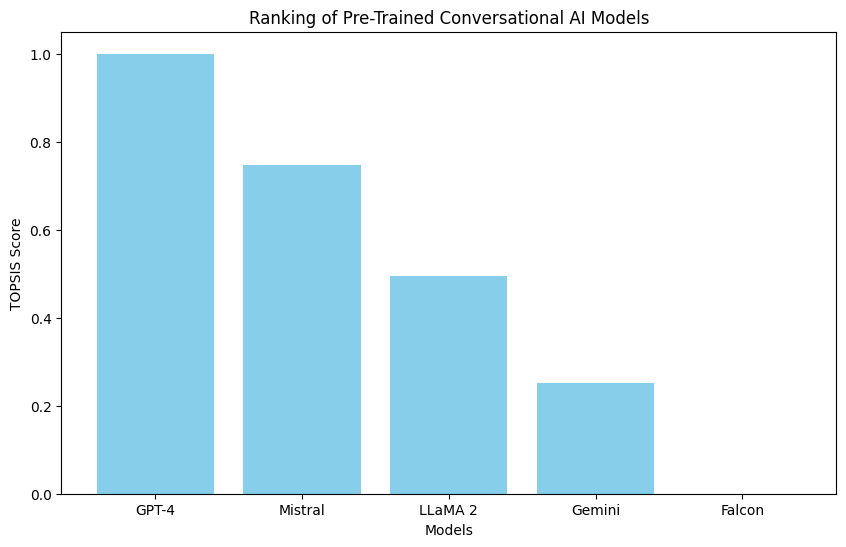

In [10]:
# Step 13: Visualize results with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ranked_models, sorted(scores, reverse=True), color='skyblue')
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.title("Ranking of Pre-Trained Conversational AI Models")
plt.show()